## Test set inference for NN trained on raw DR2 parallax

Using TensorFlow backend.


Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 175.82s elapsed


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


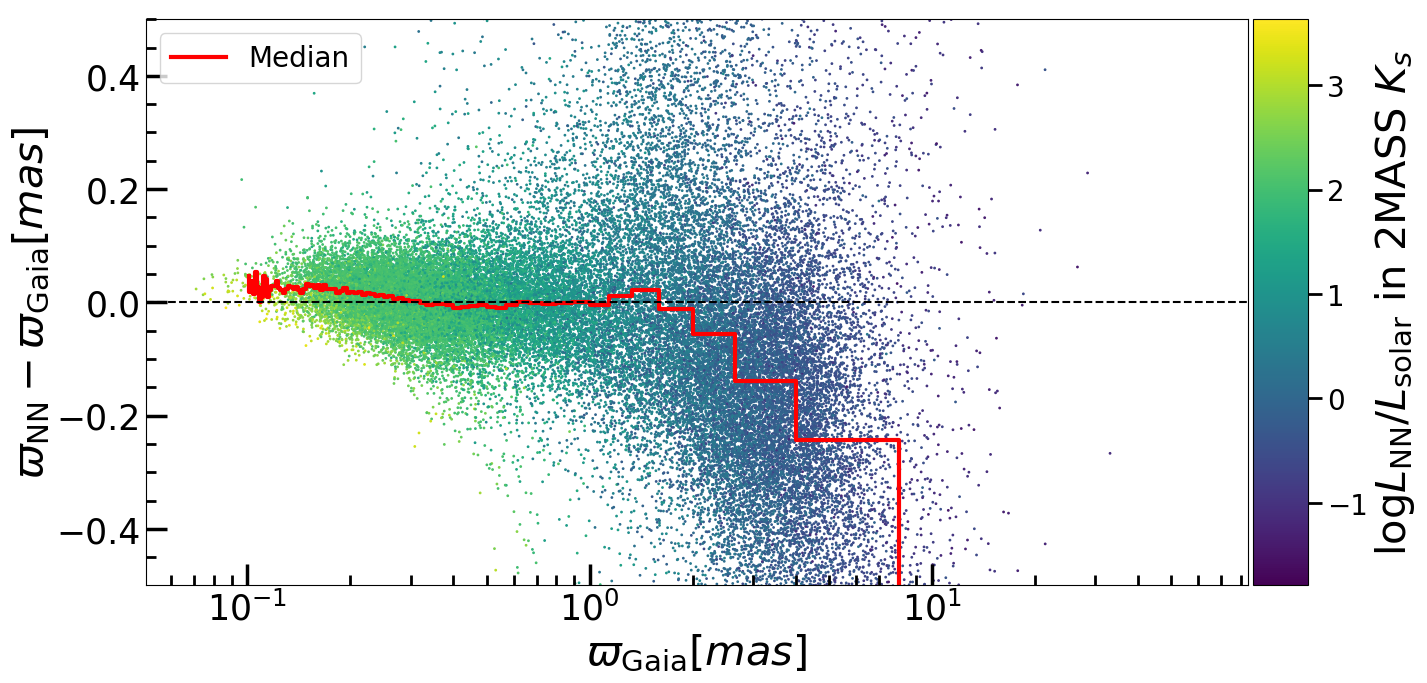

In [1]:
%matplotlib inline
from astroNN.models import load_folder
from astroNN.nn.numpy import median_absolute_percentage_error as mape
from astroNN.gaia import mag_to_fakemag, fakemag_to_pc, fakemag_to_logsol, fakemag_to_parallax
import h5py
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

with h5py.File('gaia_dr2_test.h5', 'r') as F:
    spectra = np.array(F['spectra'])
    parallax = np.array(F['parallax'])
    parallax_err = np.array(F['parallax_err'])
    corrected_K = np.array(F['corrected_K'])
    
net = load_folder("astroNN_Ks_fakemag")
pred, pred_error = net.test(spectra)

logsol = fakemag_to_logsol(pred[:, 0])

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = fakemag_to_parallax(pred[:, 0], corrected_K).value - parallax

for i in range(number_bin):
    idx = [(1000/parallax<spaces_dist[i+1]) & (1000/parallax>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax, residue, c=logsol, s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log{L_\mathrm{NN} /L_\mathrm{solar}}$" + " in 2MASS " + r"$K_{s}$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

## Test set inference for NN trained on raw DR2 parallax after adversarial training

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide


<Gaia 20%, <NN 20%, <SNR200:  8.37% with N=44642
<Gaia 10%, <NN 20%, <SNR200:  7.05% with N=36065
<Gaia 5%, <NN 20%, <SNR200:  6.87% with N=27195
<Gaia 20%, <NN 10%, <SNR200:  7.38% with N=7965
<Gaia 10%, <NN 10%, <SNR200:  6.32% with N=4774
<Gaia 5%, <NN 10%, <SNR200:  5.17% with N=1165
<Gaia 3%, <NN 10%, <SNR200:  4.51% with N=118
<Gaia 3%, <NN 20%, <SNR200:  6.89% with N=22002
Cannon logg<2.2 comparison
<Gaia 20%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1:  11.46% with N=1502
<Gaia 10%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1:  7.69% with N=423
<Gaia 5%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1:  5.23% with N=21


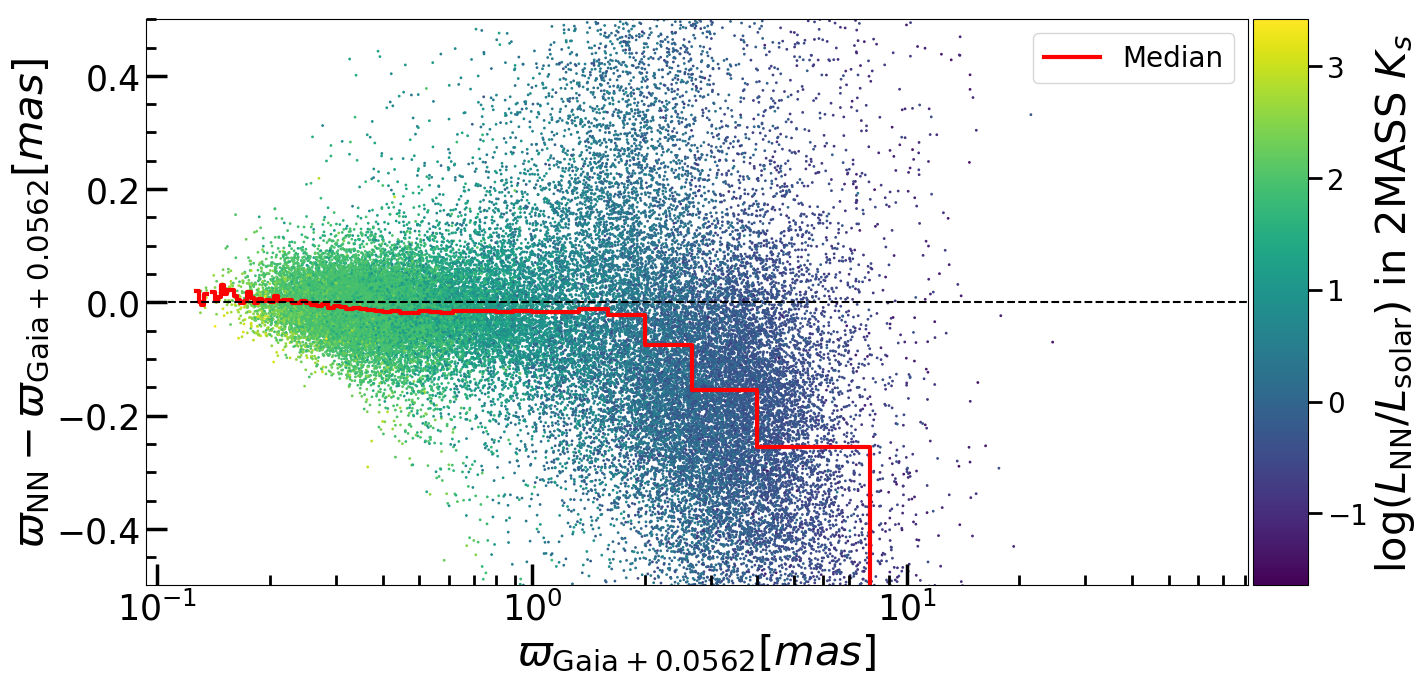

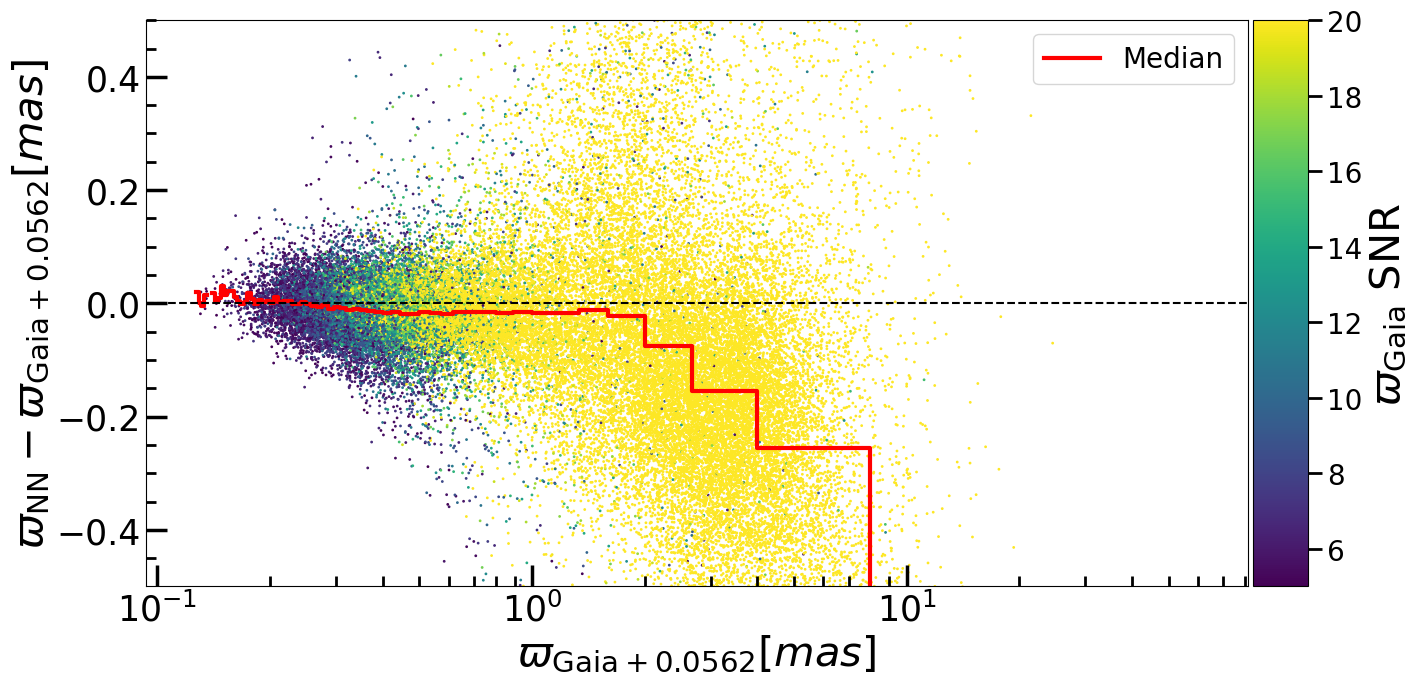

In [4]:
%matplotlib inline
from astropy.io import fits
from astroNN.models import load_folder
from astroNN.datasets.xmatch import xmatch
from astroNN.nn.numpy import median_absolute_percentage_error as mape
from astroNN.gaia import mag_to_fakemag, fakemag_to_pc, fakemag_to_logsol, fakemag_to_parallax
import h5py
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 

with h5py.File('gaia_dr2_test.h5', 'r') as F:
    RA = np.array(F['RA'])
    DEC = np.array(F['DEC'])
    spectra = np.array(F['spectra'])
    parallax_raw = np.array(F['parallax'])
    parallax = parallax_raw + 0.0562
    parallax_err = np.array(F['parallax_err'])
    corrected_K = np.array(F['corrected_K'])
    SNR = np.array(F['SNR'])

f_nn = fits.getdata('astroNN_apogee_dr14_catalog.fits')
idx_1, idx_2, sep = xmatch(RA, f_nn['ra'], colRA1=RA, colDec1=DEC, colRA2=f_nn["ra"], colDec2=f_nn["dec"])

net = load_folder("astroNN_Ks_fakemag_adversial")
pred, pred_error = net.test(spectra)

logsol = fakemag_to_logsol(pred[:, 0])

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = fakemag_to_parallax(pred[:, 0], corrected_K).value - parallax

for i in range(number_bin):
    idx = [(1000/parallax<spaces_dist[i+1]) & (1000/parallax>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax, residue, c=logsol, s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{NN} /L_\mathrm{solar})$" + " in 2MASS " + r"$K_{s}$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax, residue, c=np.clip(parallax_raw/parallax_err, 0., 20.), s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r'$ \varpi_{\mathrm{Gaia}}$' + " SNR", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

good_idx = [(parallax_raw/parallax_err>5.) & (pred[:, 0]/pred_error["total"][:, 0]>5.)]
print("<Gaia 20%, <NN 20%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value, 1000/parallax):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>10.) & (pred[:, 0]/pred_error["total"][:, 0]>5.)]
print("<Gaia 10%, <NN 20%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>20.) & (pred[:, 0]/pred_error["total"][:, 0]>5.)]
print("<Gaia 5%, <NN 20%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>5.) & (pred[:, 0]/pred_error["total"][:, 0]>10.)]
print("<Gaia 20%, <NN 10%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>10.) & (pred[:, 0]/pred_error["total"][:, 0]>10.)]
print("<Gaia 10%, <NN 10%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>20.) & (pred[:, 0]/pred_error["total"][:, 0]>10.)]
print("<Gaia 5%, <NN 10%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>33.333) & (pred[:, 0]/pred_error["total"][:, 0]>10.)]
print("<Gaia 3%, <NN 10%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw/parallax_err>33.333) & (pred[:, 0]/pred_error["total"][:, 0]>5.)]
print("<Gaia 3%, <NN 20%, <SNR200: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[good_idx], 1000/parallax[good_idx]):.{2}f}% with N={np.sum(good_idx)}")

print("Cannon logg<2.2 comparison")
good_idx = [(parallax_raw[idx_1]/parallax_err[idx_1]>5.) & (pred[:, 0][idx_1]/pred_error["total"][:, 0][idx_1]>5.) & 
            (pred[:, 0][idx_1]<142) & (f_nn["astroNN"][:, 1][idx_2]<2.2)]
print("<Gaia 20%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[idx_1][good_idx], 1000/parallax[idx_1][good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw[idx_1]/parallax_err[idx_1]>10.) & (pred[:, 0][idx_1]/pred_error["total"][:, 0][idx_1]>5.) & 
            (pred[:, 0][idx_1]<142) & (f_nn["astroNN"][:, 1][idx_2]<2.2)]
print("<Gaia 10%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[idx_1][good_idx], 1000/parallax[idx_1][good_idx]):.{2}f}% with N={np.sum(good_idx)}")
good_idx = [(parallax_raw[idx_1]/parallax_err[idx_1]>20.) & (pred[:, 0][idx_1]/pred_error["total"][:, 0][idx_1]>5.) & 
            (pred[:, 0][idx_1]<142) & (f_nn["astroNN"][:, 1][idx_2]<2.2)]
print("<Gaia 5%, <NN 20%, <SNR200, logg<2.2, log(Lsol)>1: ", 
      f"{mape(fakemag_to_pc(pred[:, 0], corrected_K).value[idx_1][good_idx], 1000/parallax[idx_1][good_idx]):.{2}f}% with N={np.sum(good_idx)}")

## Checking with result (NN after adversarial training)

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!


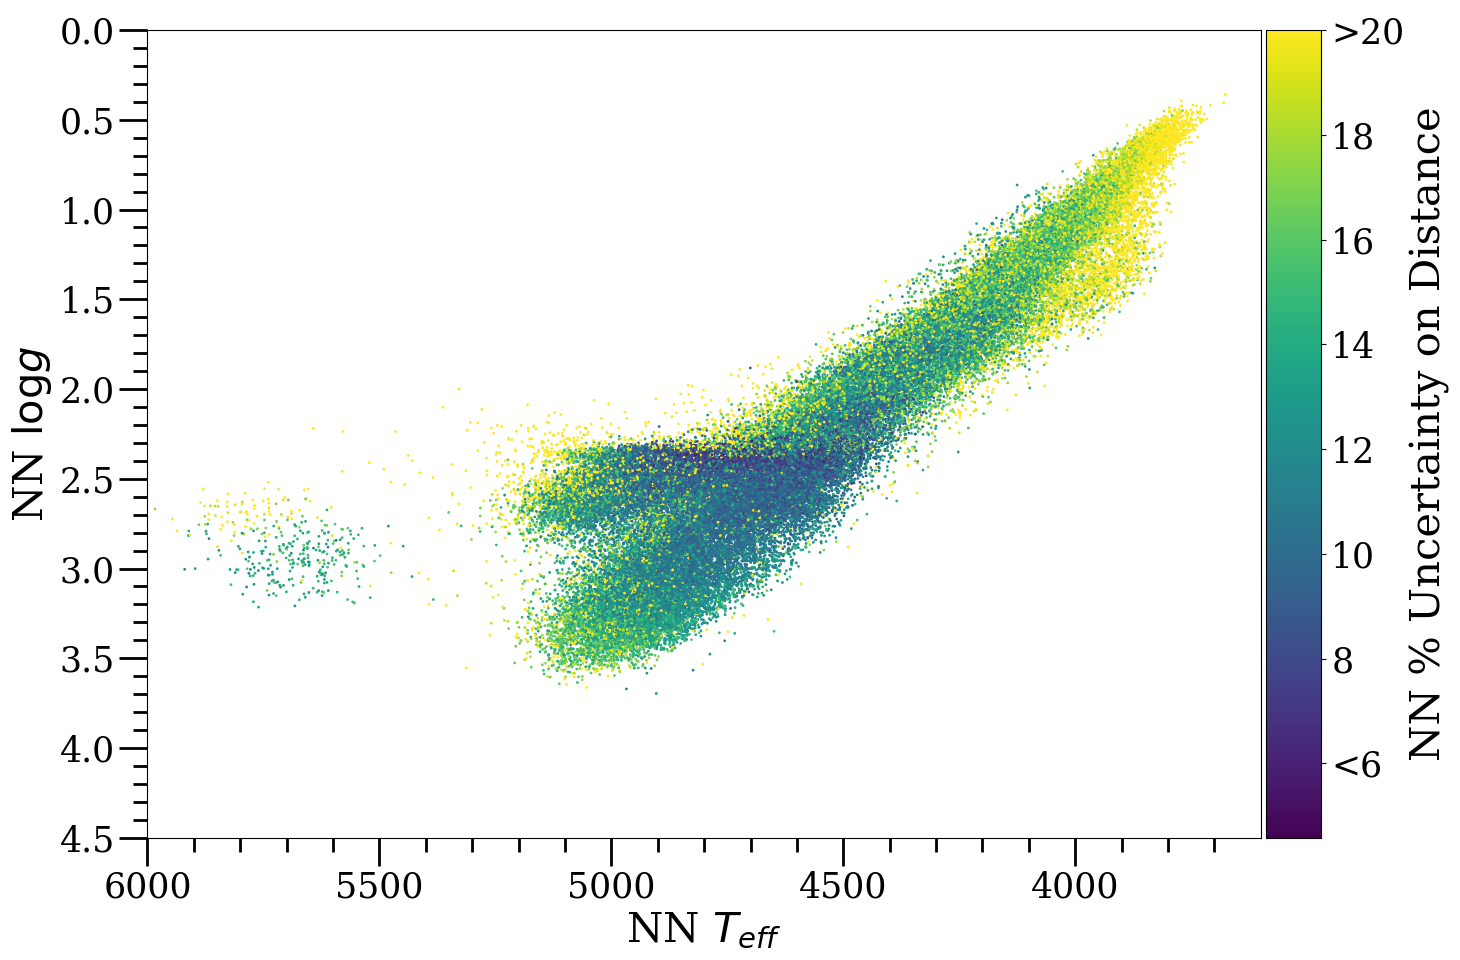

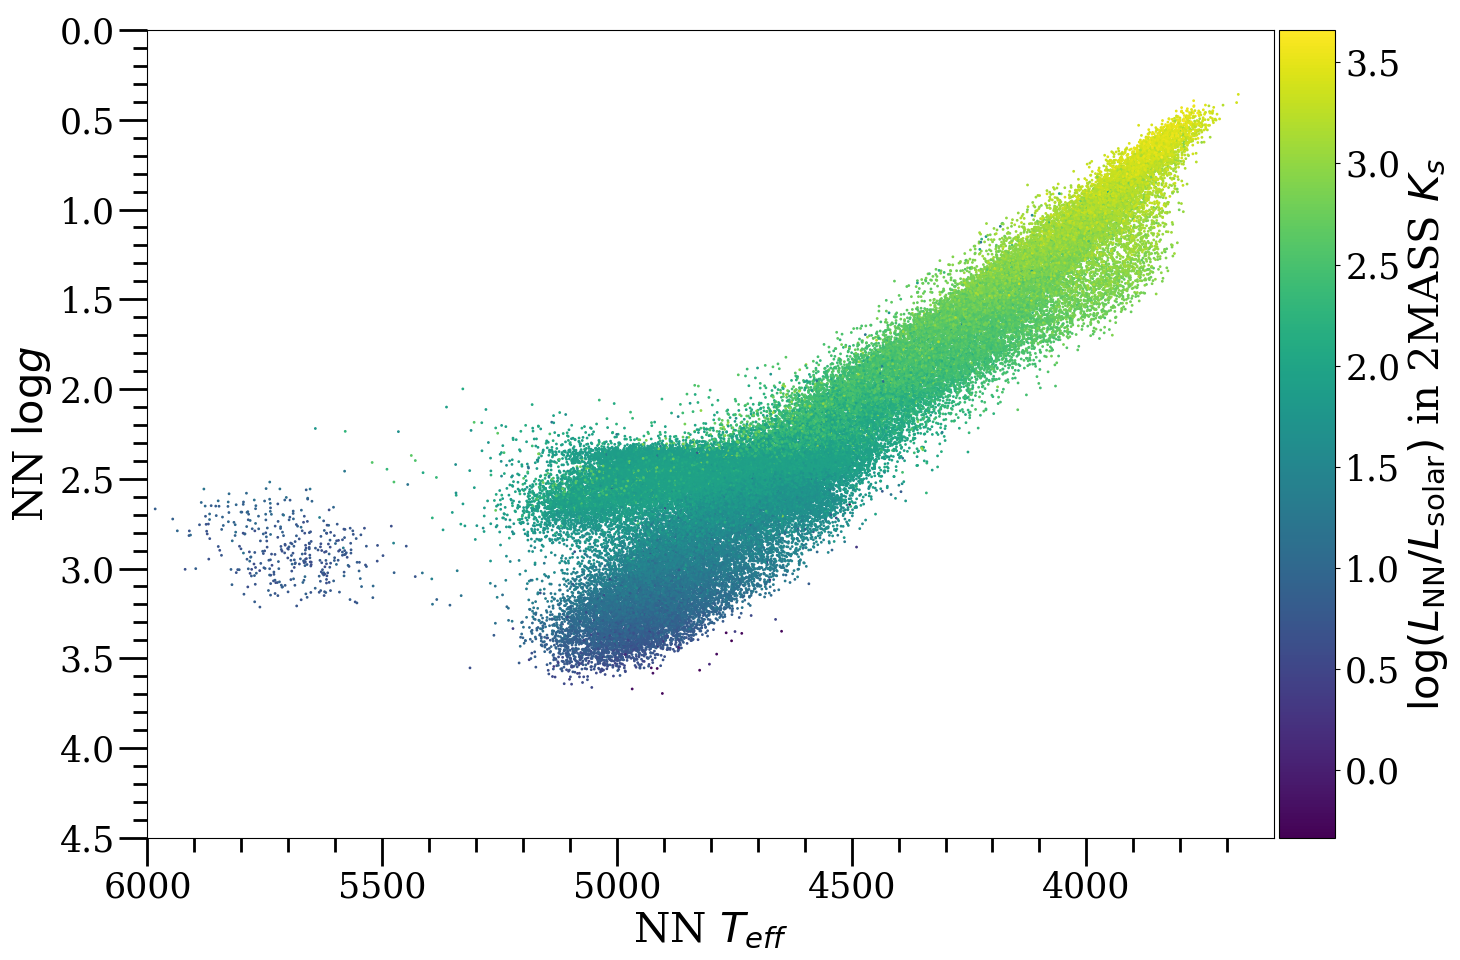

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.gaia import fakemag_to_logsol
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

f_dist = fits.getdata("apogee_dr14_nn_dist_0562.fits")
f_chem = fits.getdata("astroNN_apogee_dr14_catalog.fits")
allstar_dr14 = fits.getdata(allstar(dr=14))

nn_teff = f_chem['astroNN'][:, 0]
nn_teff_error = f_chem['astroNN_error'][:, 0]
nn_logg = f_chem['astroNN'][:, 1]
nn_logg_error = f_chem['astroNN_error'][:, 1]
nn_feh = f_chem['astroNN'][:, 19]
nn_feh_error = f_chem['astroNN_error'][:, 19]
dist = f_dist['pc']
fakemag = f_dist['fakemag']
dist_err = f_dist['pc_error']

good_idx = [(dist / dist_err >= 1.) & (nn_teff / nn_teff_error > 1.) & (nn_logg / nn_logg_error > 1.) & 
            (nn_logg_error < .2) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0)]

good_idx_feh = [(dist / dist_err >= 1.) & (nn_feh_error < 1.) & (nn_logg_error < .2)]


fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., 
            c=np.clip(100*dist_err[good_idx]/dist[good_idx], 0, 20), rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["<6", "8", "10", "12", "14", "16", "18", ">20"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN % Uncertainty on Distance", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()


fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., c=fakemag_to_logsol(fakemag[good_idx]), rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
# cbar.ax.set_yticklabels(["<25", *[str(r) for r in [35, 45, 55, 65]], ">75"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r"$\log (L_\mathrm{NN} /L_\mathrm{solar})$ in 2MASS $K_{s}$", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()

### Isochrones from http://stev.oapd.inaf.it/cgi-bin/cmd_3.0

**Configuration:**
- PARSEC v1.2S + COLIBRI PR16
- Gaia DR2 + Tycho2 + 2MASS (all Veggamags)
- NBC as described on Chen et al. (2014), based on PHOENIX BT-Settl for Teff<4000 K, and on ATLAS9 ODFNEW otherwise or on
- Aringer et al. (2009) (updated to include new spectra from Aringer et al. (2016)) 
- No dust
- Single isochrone of t = $5.0x10^{9}$ yr, and $[Z/H]$ = $0.25$, $-0.25$, $-0.75$, $-1.75$

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!


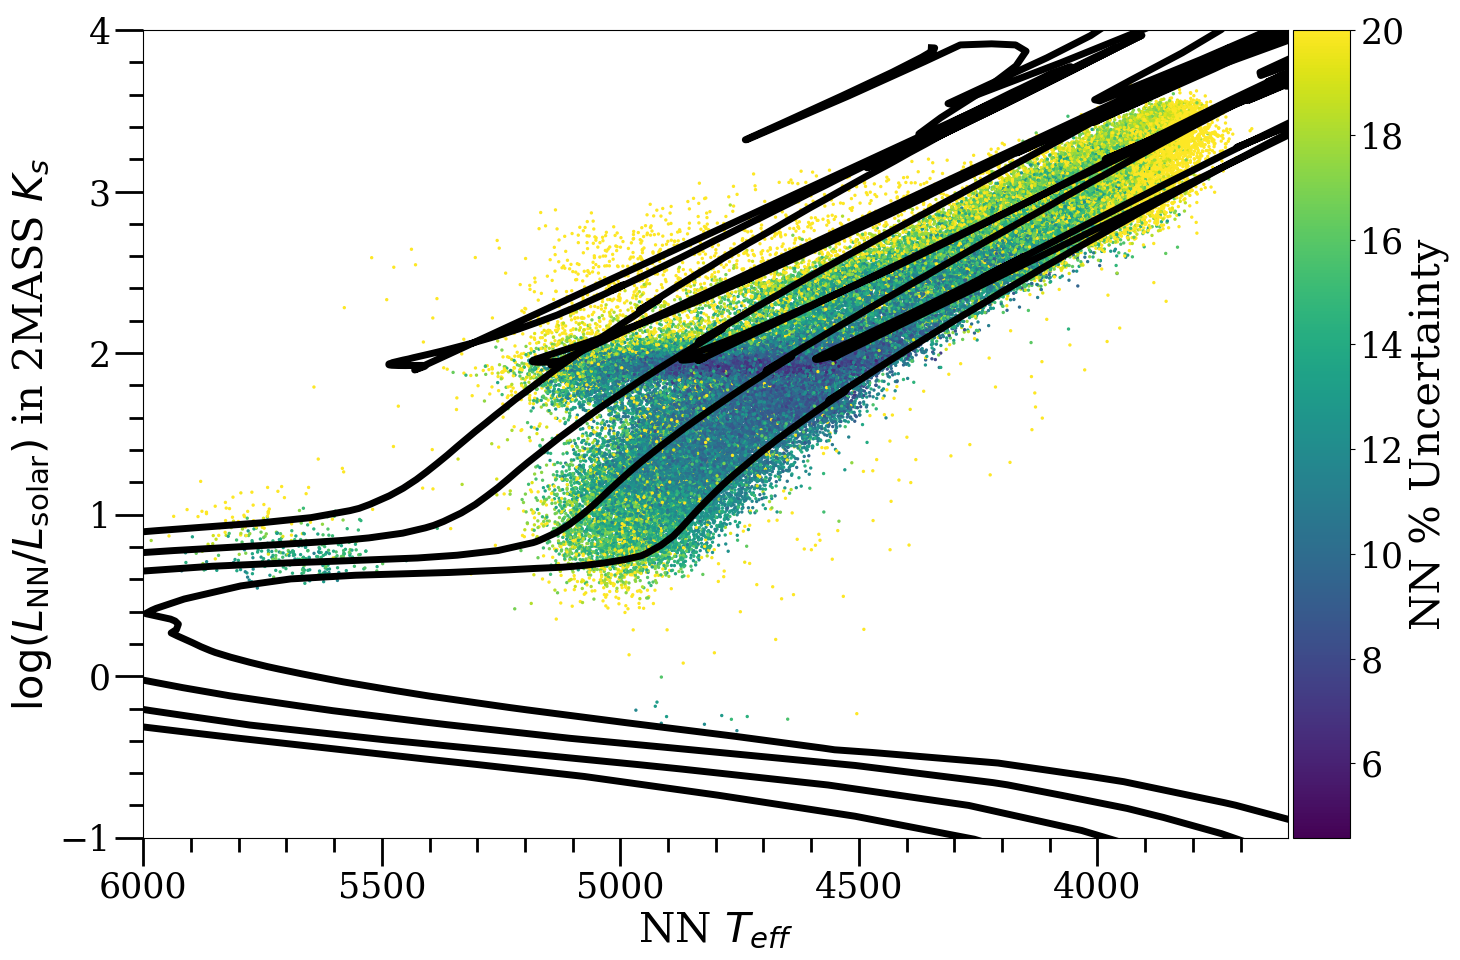

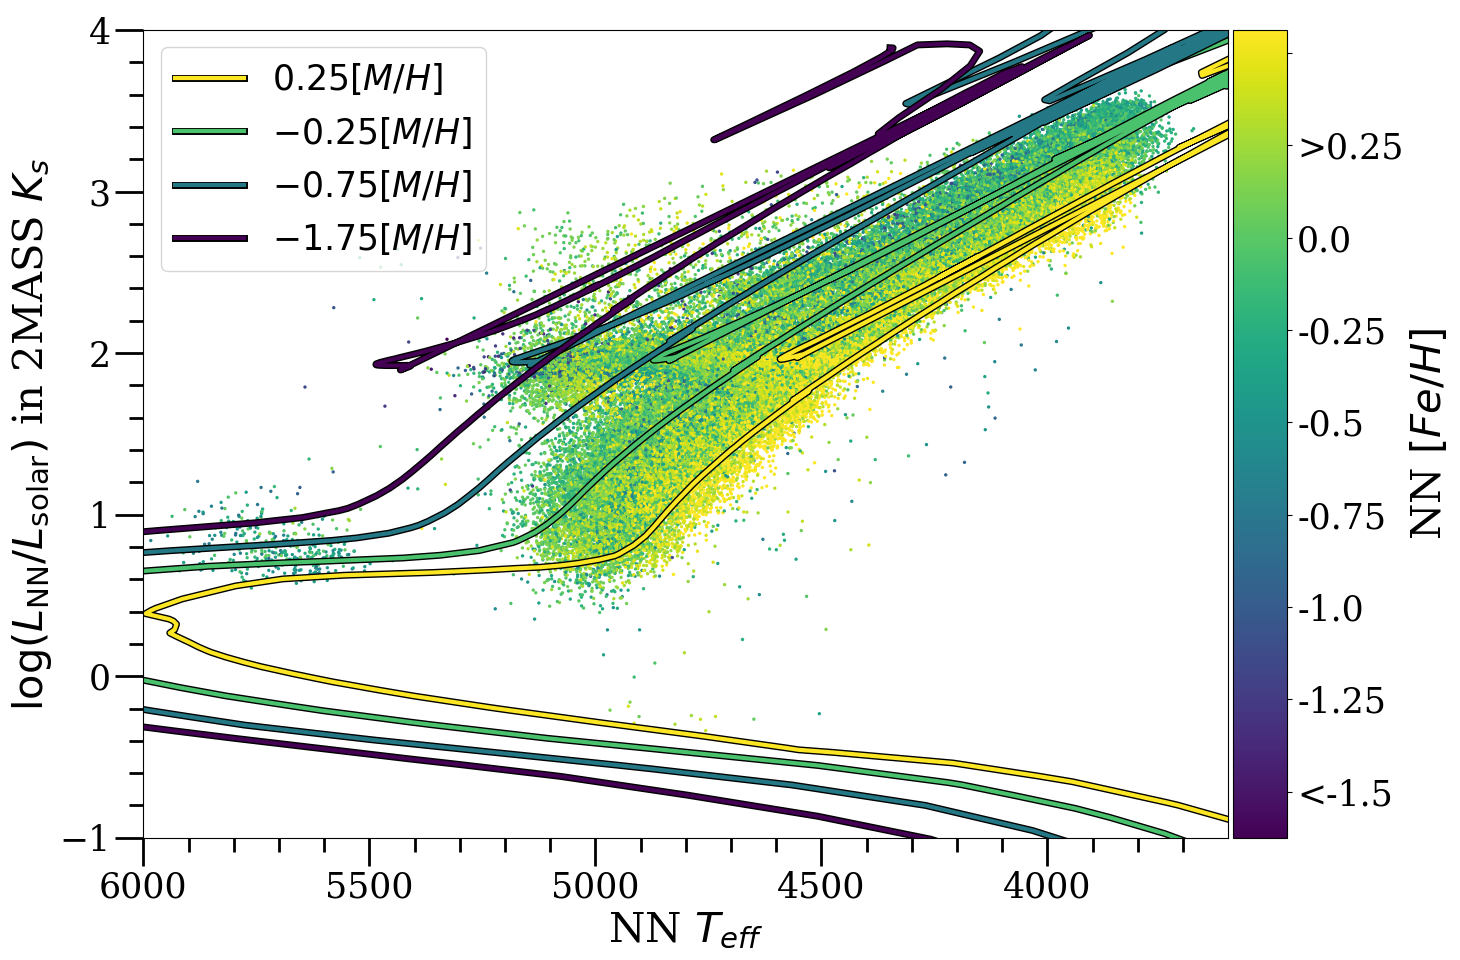

In [5]:
%matplotlib inline
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.gaia import fakemag_to_logsol, absmag_to_logsol
import astropy.io.ascii
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

# load +0.25Z
data_p025 = astropy.io.ascii.read('isochrones\z_p025.dat')
teff_isochrone_p025 = 10 ** data_p025['col6']
Ks_isochrone_p025 = data_p025['col31']
good_idx_p025 = [(Ks_isochrone_p025 > -1000.) & (teff_isochrone_p025 < 6200)]
log_Ks_isochrone_p025 = absmag_to_logsol(Ks_isochrone_p025)

# load -0.25Z
data_n025 = astropy.io.ascii.read('isochrones\z_n025.dat')
teff_isochrone_n025 = 10 ** data_n025['col6']
Ks_isochrone_n025 = data_n025['col31']
good_idx_n025 = [(Ks_isochrone_n025 > -1000.) & (teff_isochrone_n025 < 6200)]
log_Ks_isochrone_n025 = absmag_to_logsol(Ks_isochrone_n025)

# load -0.75Z
data_n075 = astropy.io.ascii.read('isochrones\z_n075.dat')
teff_isochrone_n075 = 10 ** data_n075['col6']
Ks_isochrone_n075 = data_n075['col31']
good_idx_n075 = [(Ks_isochrone_n075 > -1000.) & (teff_isochrone_n075 < 6200)]
log_Ks_isochrone_n075 = absmag_to_logsol(Ks_isochrone_n075)

# load -1.75Z
data_n175 = astropy.io.ascii.read('isochrones\z_n175.dat')
teff_isochrone_n175 = 10 ** data_n175['col6']
Ks_isochrone_n175 = data_n175['col31']
good_idx_n175 = [(Ks_isochrone_n175 > -1000.) & (teff_isochrone_n175 < 6200)]
log_Ks_isochrone_n175 = absmag_to_logsol(Ks_isochrone_n175)

f_dist = fits.getdata("apogee_dr14_nn_dist_0562.fits")
f_chem = fits.getdata("astroNN_apogee_dr14_catalog.fits")
allstar_dr14 = fits.getdata(allstar(dr=14))

nn_teff = f_chem['astroNN'][:, 0]
nn_teff_error = f_chem['astroNN_error'][:, 0]
nn_logg = f_chem['astroNN'][:, 1]
nn_logg_error = f_chem['astroNN_error'][:, 1]
fakemag = f_dist['fakemag']
nn_feh = f_chem['astroNN'][:, 19]
nn_feh_error = f_chem['astroNN_error'][:, 19]

good_idx = [(dist / dist_err >= 1.) & (nn_teff / nn_teff_error > 1.) & (nn_logg / nn_logg_error > 1.) & 
            (nn_logg_error < .2) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0)]

good_idx_feh = [(dist / dist_err >= 1.) & (nn_teff / nn_teff_error > 1.) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0) 
                & (nn_feh_error < .5) & (nn_logg_error < .2)]

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], fakemag_to_logsol(fakemag[good_idx]), s=2., 
            c=np.clip(100*dist_err[good_idx]/dist[good_idx], 0, 20), rasterized=True)
# screenshot and use PhotoShop to find the right color in hex
plt.plot(teff_isochrone_p025[good_idx_p025], log_Ks_isochrone_p025[good_idx_p025], lw=3., c='#000000',
         label=r'$0.25 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n025[good_idx_n025], log_Ks_isochrone_n025[good_idx_n025], lw=3., c='#000000',
         label=r'$-0.25 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n075[good_idx_n075], log_Ks_isochrone_n075[good_idx_n075], lw=3., c='#000000',
         label=r'$-0.75 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n175[good_idx_n175], log_Ks_isochrone_n175[good_idx_n175], lw=3., c='#000000',
         label=r'$-1.75 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel("$\log (L_\mathrm{NN} /L_\mathrm{solar})$ in 2MASS $K_{s}$", fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((-1, 4.))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
# ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
# cbar.ax.set_yticklabels(["<25", *[str(r) for r in [35, 45, 55, 65]], ">75"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN % Uncertainty", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()



fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx_feh], fakemag_to_logsol(fakemag[good_idx_feh]), s=2., 
            c=np.clip(nn_feh[good_idx_feh], -1.5, 0.25), rasterized=True)
# screenshot and use PhotoShop to find the right color in hex
plt.plot(teff_isochrone_p025[good_idx_p025], log_Ks_isochrone_p025[good_idx_p025], lw=3., c='#fde725',
         label=r'$0.25 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n025[good_idx_n025], log_Ks_isochrone_n025[good_idx_n025], lw=3., c='#4ac16d',
         label=r'$-0.25 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n075[good_idx_n075], log_Ks_isochrone_n075[good_idx_n075], lw=3., c='#247886',
         label=r'$-0.75 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.plot(teff_isochrone_n175[good_idx_n175], log_Ks_isochrone_n175[good_idx_n175], lw=3., c='#440154',
         label=r'$-1.75 [M/H]$',
         path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()])
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel("$\log (L_\mathrm{NN} /L_\mathrm{solar})$ in 2MASS $K_{s}$", fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((-1, 4.))
plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
# ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["<-1.5", '-1.25', '-1.0', '-0.75', '-0.5', '-0.25', '0.0', ">0.25"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN " + "$[Fe/H]$", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()

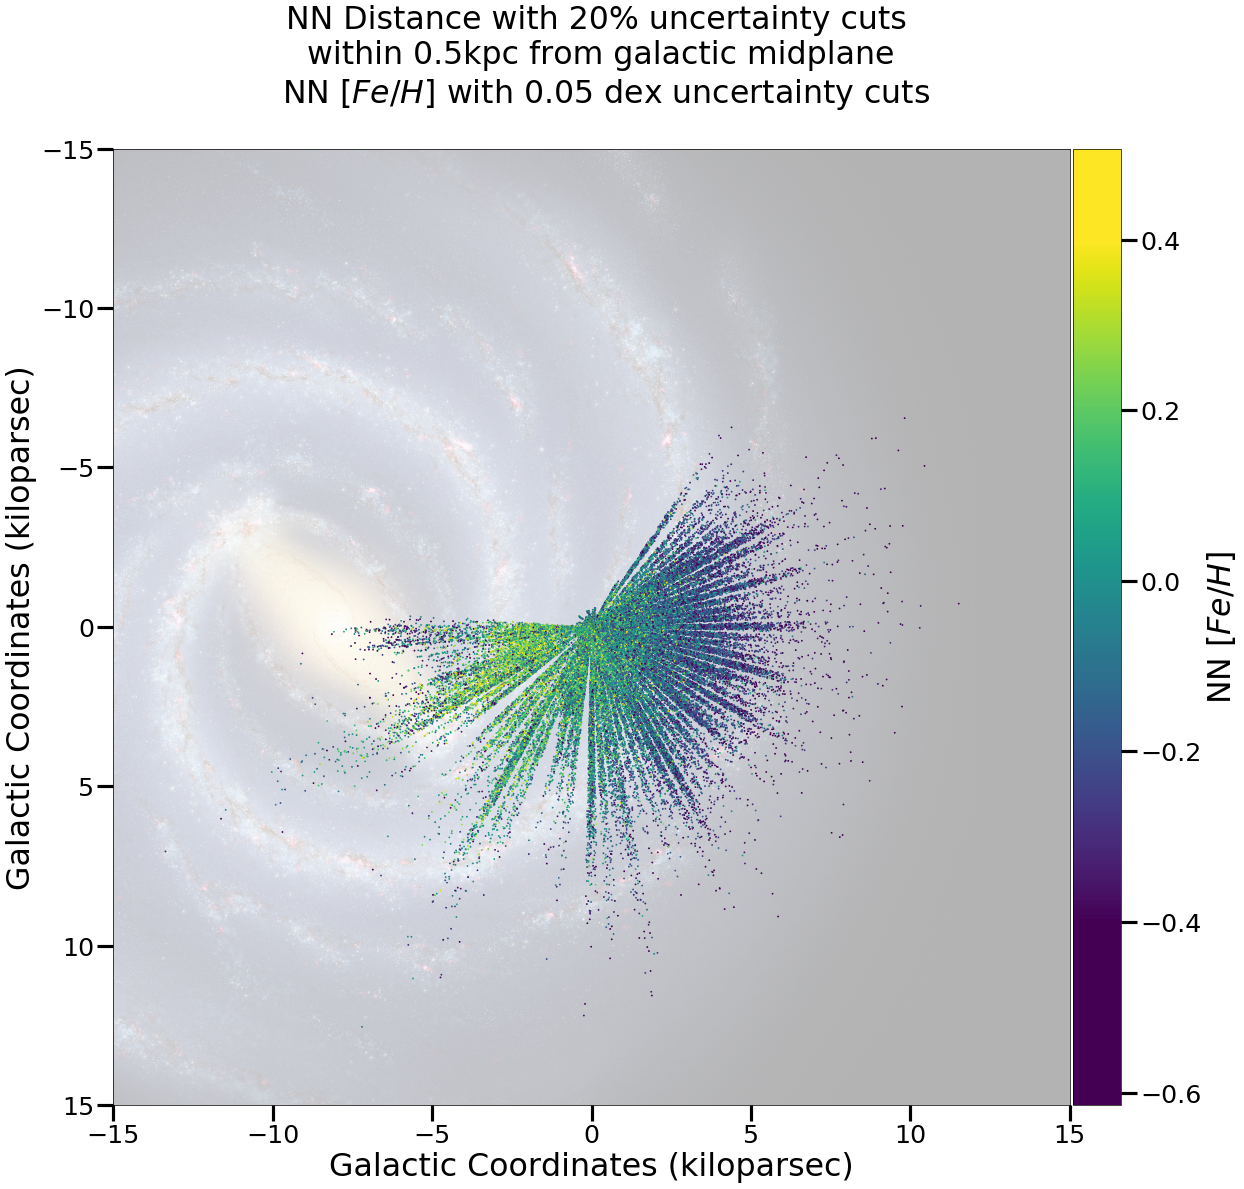

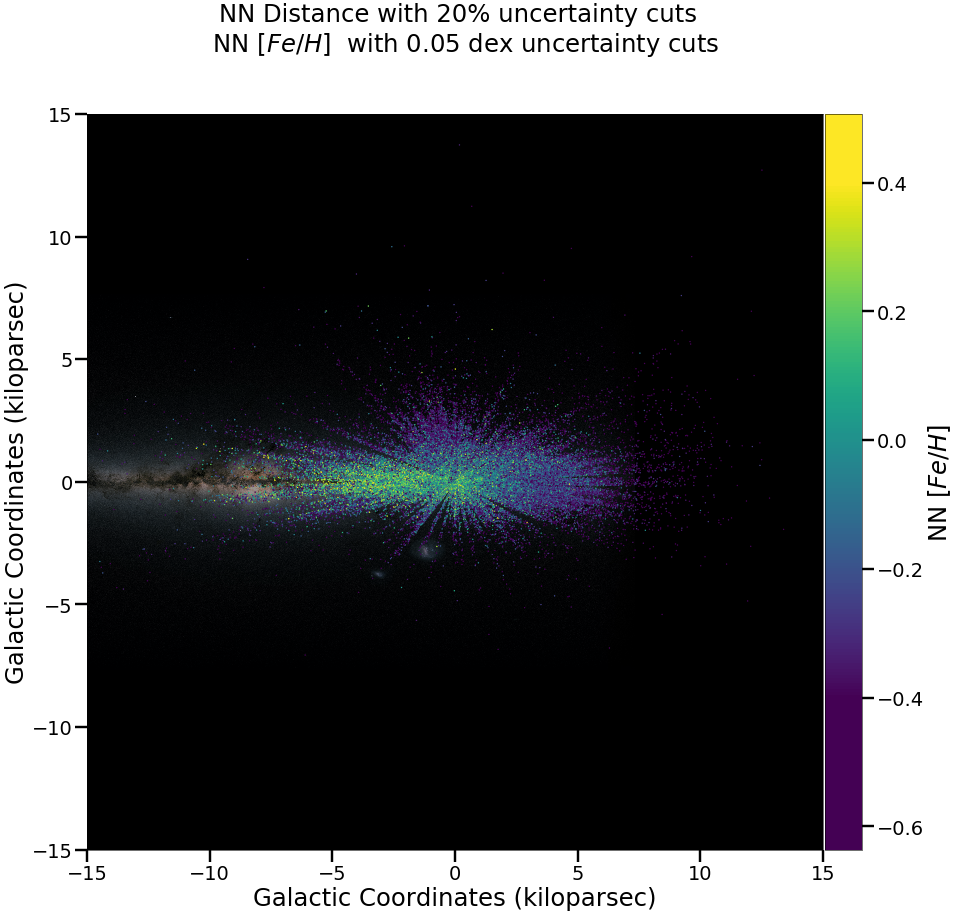

In [1]:
%matplotlib inline
from mw_plot import MWPlot
from astropy import units as  u
import astropy.coordinates as apycoords
from astropy.io import fits
import numpy as np
import pylab as plt

f_dist = fits.getdata("apogee_dr14_nn_dist_0562.fits")
nn_distance = f_dist["pc"]
nn_distance_error = f_dist["pc_error"]

f = fits.open("astroNN_apogee_dr14_catalog.fits")
FeH = f[1].data["astroNN"][:, 19]
FeH_uncertainty = f[1].data["astroNN_error"][:, 19]

ra = f[1].data["RA"] * u.deg
dec = f[1].data["DEC"]* u.deg
c = apycoords.SkyCoord(ra=ra, dec=dec, distance=nn_distance * u.parsec, frame='icrs')

good_idx = [(nn_distance_error / nn_distance < 0.2) & (FeH != -9999.) & (FeH_uncertainty < 0.05) & 
            (np.abs(c.galactic.cartesian.z.value) < 500)]

c = c[good_idx]

# setup a MWPlot instance
plot_instance = MWPlot(radius=15 * u.kpc, unit=u.kpc, coord='galactic', annotation=False)

# so that the colorbar will has a better contract
plot_instance.clim = (-0.4, 0.4)
plot_instance.dpi=65

# alpha value for the nmilkyway image
plot_instance.imalpha = 0.3
plot_instance.facecolor = 'w'

# set up plot title
plot_instance.title = 'NN Distance with 20% uncertainty cuts \n within 0.5kpc from galactic midplane \n NN $[Fe/H]$ with 0.05 dex uncertainty cuts'

# use mw_scatter instead of scatter because we want a colorbar
# need to flip the sign of x because astropy is left-handed but mw_plot is right-handed
plot_instance.mw_scatter(-c.galactic.cartesian.x, c.galactic.cartesian.y,
                         [FeH[good_idx], 'NN $[Fe/H]$'])

plot_instance.tight_layout = False
# Save the figure
# plot_instance.savefig(file='nn_feh_mw.pdf')
# =====================================================================================================
c2 = apycoords.SkyCoord(ra=ra, dec=dec, distance=nn_distance * u.parsec, frame='icrs')

good_idx2 = [(nn_distance_error / nn_distance < 0.2) & (FeH != -9999.) & (FeH_uncertainty < 0.05)]
c2 = c2[good_idx2]

# setup a MWPlot instance
plot_instance2 = MWPlot(mode='edge-on', radius=15 * u.kpc, unit=u.kpc, coord='galactic')

# so that the colorbar will has a better contract
plot_instance2.clim = (-0.4, 0.4)
plot_instance2.dpi=50

# alpha value for the milkyway image
plot_instance2.imalpha = 0.6

# set up plot title
plot_instance2.title = 'NN Distance with 20% uncertainty cuts \n NN $[Fe/H]$  with 0.05 dex uncertainty cuts'

# use mw_scatter instead of scatter because we want a colorbar
# need to flip the sign of x because astropy is left-handed but mw_plot is right-handed
plot_instance2.mw_scatter(-c2.galactic.cartesian.x, c2.galactic.cartesian.z,
                          [FeH[good_idx2], 'NN $[Fe/H]$'])

plot_instance2.tight_layout = False
# Save the figure
# plot_instance2.savefig(file='gaia.pdf')